## Long Island Hedonic Analysis - Draft
### Visualizing the data
#### created by Doug Patton
<br>
If you run the notebook with matplotlib widgets turned on (and installed), you can rotate and zoom in on the 3d plots. 

In [1]:
import island

In [2]:
import numpy as np
import pandas as pd

In [3]:
#from importlib import reload  
#reload(island)

In [4]:
%matplotlib inline
#may be necessary to display plots inline on some systems
#%pylab #interactive graphs in external window
#%matplotlib widget #makes graphs interactive inline

In [5]:
idata_obj=island.IslandData()

In [6]:
#idata_obj.getDataFromCSV() # run once

In [7]:
#idata_obj.doCSVToDict() # run once

In [8]:
idata_obj.makeTimeListArrayList()

In [9]:
#create new real version for each dollar variable using the CPI
baseyear=2015
idata_obj.addRealByCPI(to_year=baseyear)


In [10]:
idata_obj.arrayListToPandasDF()

In [11]:
idata_obj.doDistanceVars()

In [12]:
#idata_obj.justMakeWeights()

In [13]:
for scope in ['year']:
    for est in ['OLS', 'GM_Error_Het']:
        idata_obj.modeldict['modeltype']=est
        idata_obj.modeldict['NNscope']=scope
        idata_obj.runModel()

In [14]:
#idata_obj.printModelSummary()
idata_obj.printModelSummary(stars=1)

r2val 0.5182818 r2round 0.518 modeltype OLS
r2val 0.44994837 r2round 0.45 modeltype OLS
r2val 0.5165846626206061 r2round 0.517 modeltype GM_Error_Het
r2val 0.44822175307045503 r2round 0.448 modeltype GM_Error_Het


/home/dp/gits/island/island_effects.py:353: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


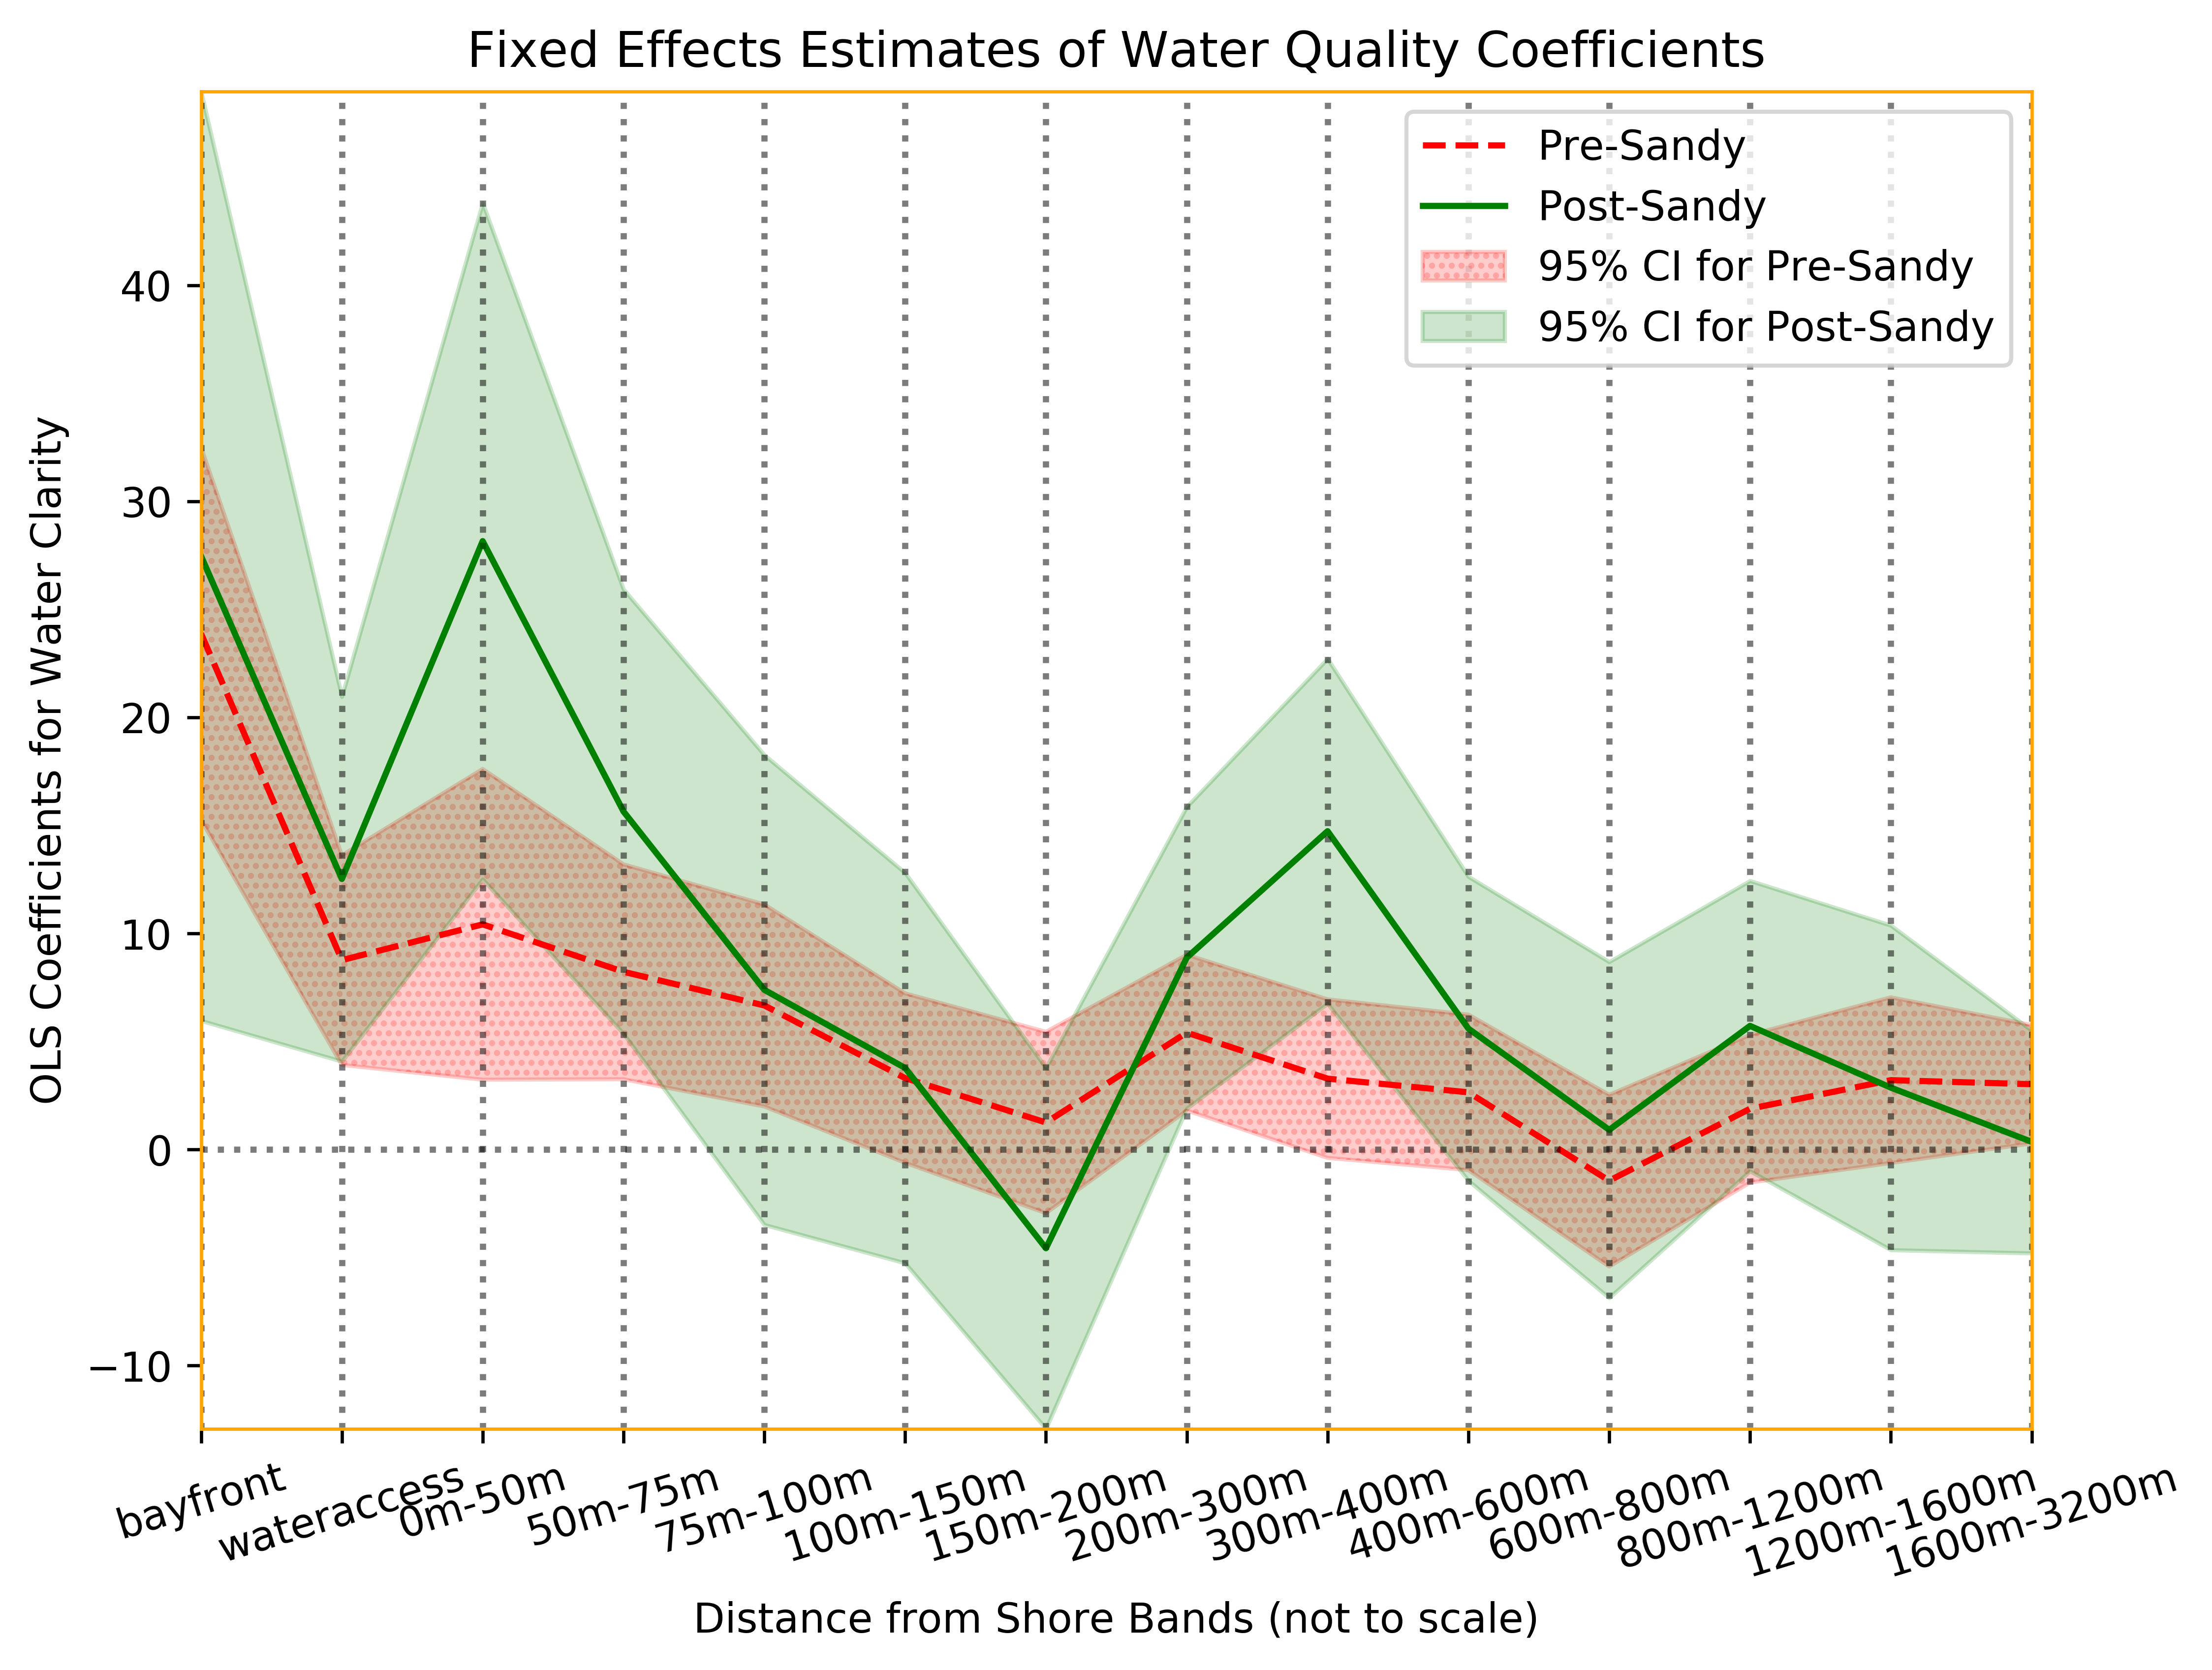

In [15]:
idata_obj.createWQGraph()

annual_dist_avg_effects for period-0, r=0.03

                                   effect
bayfront                           3064.0
wateraccess                         600.0
Distance to Shoreline 0m-50m        582.0
Distance to Shoreline 50m-75m       516.0
Distance to Shoreline 75m-100m      447.0
Distance to Shoreline 100m-150m     266.0
Distance to Shoreline 150m-200m     159.0
Distance to Shoreline 200m-300m     388.0
Distance to Shoreline 300m-400m     283.0
Distance to Shoreline 400m-600m     239.0
Distance to Shoreline 600m-800m      27.0
Distance to Shoreline 800m-1200m    187.0
Distance to Shoreline 1200m-1600m   229.0
Distance to Shoreline 1600m-3200m   225.0
Distance to Shoreline 3200m-4000m    82.0
weighted grand average effect for p-0, r=0.03,
 effect    252.675402
dtype: float64
annual_dist_avg_effects for period-1, r=0.03

                                   effect
bayfront                           2967.0
wateraccess                         564.0
Distance to Shoreline 0m-5

/home/dp/gits/island/island_effects.py:304: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot()


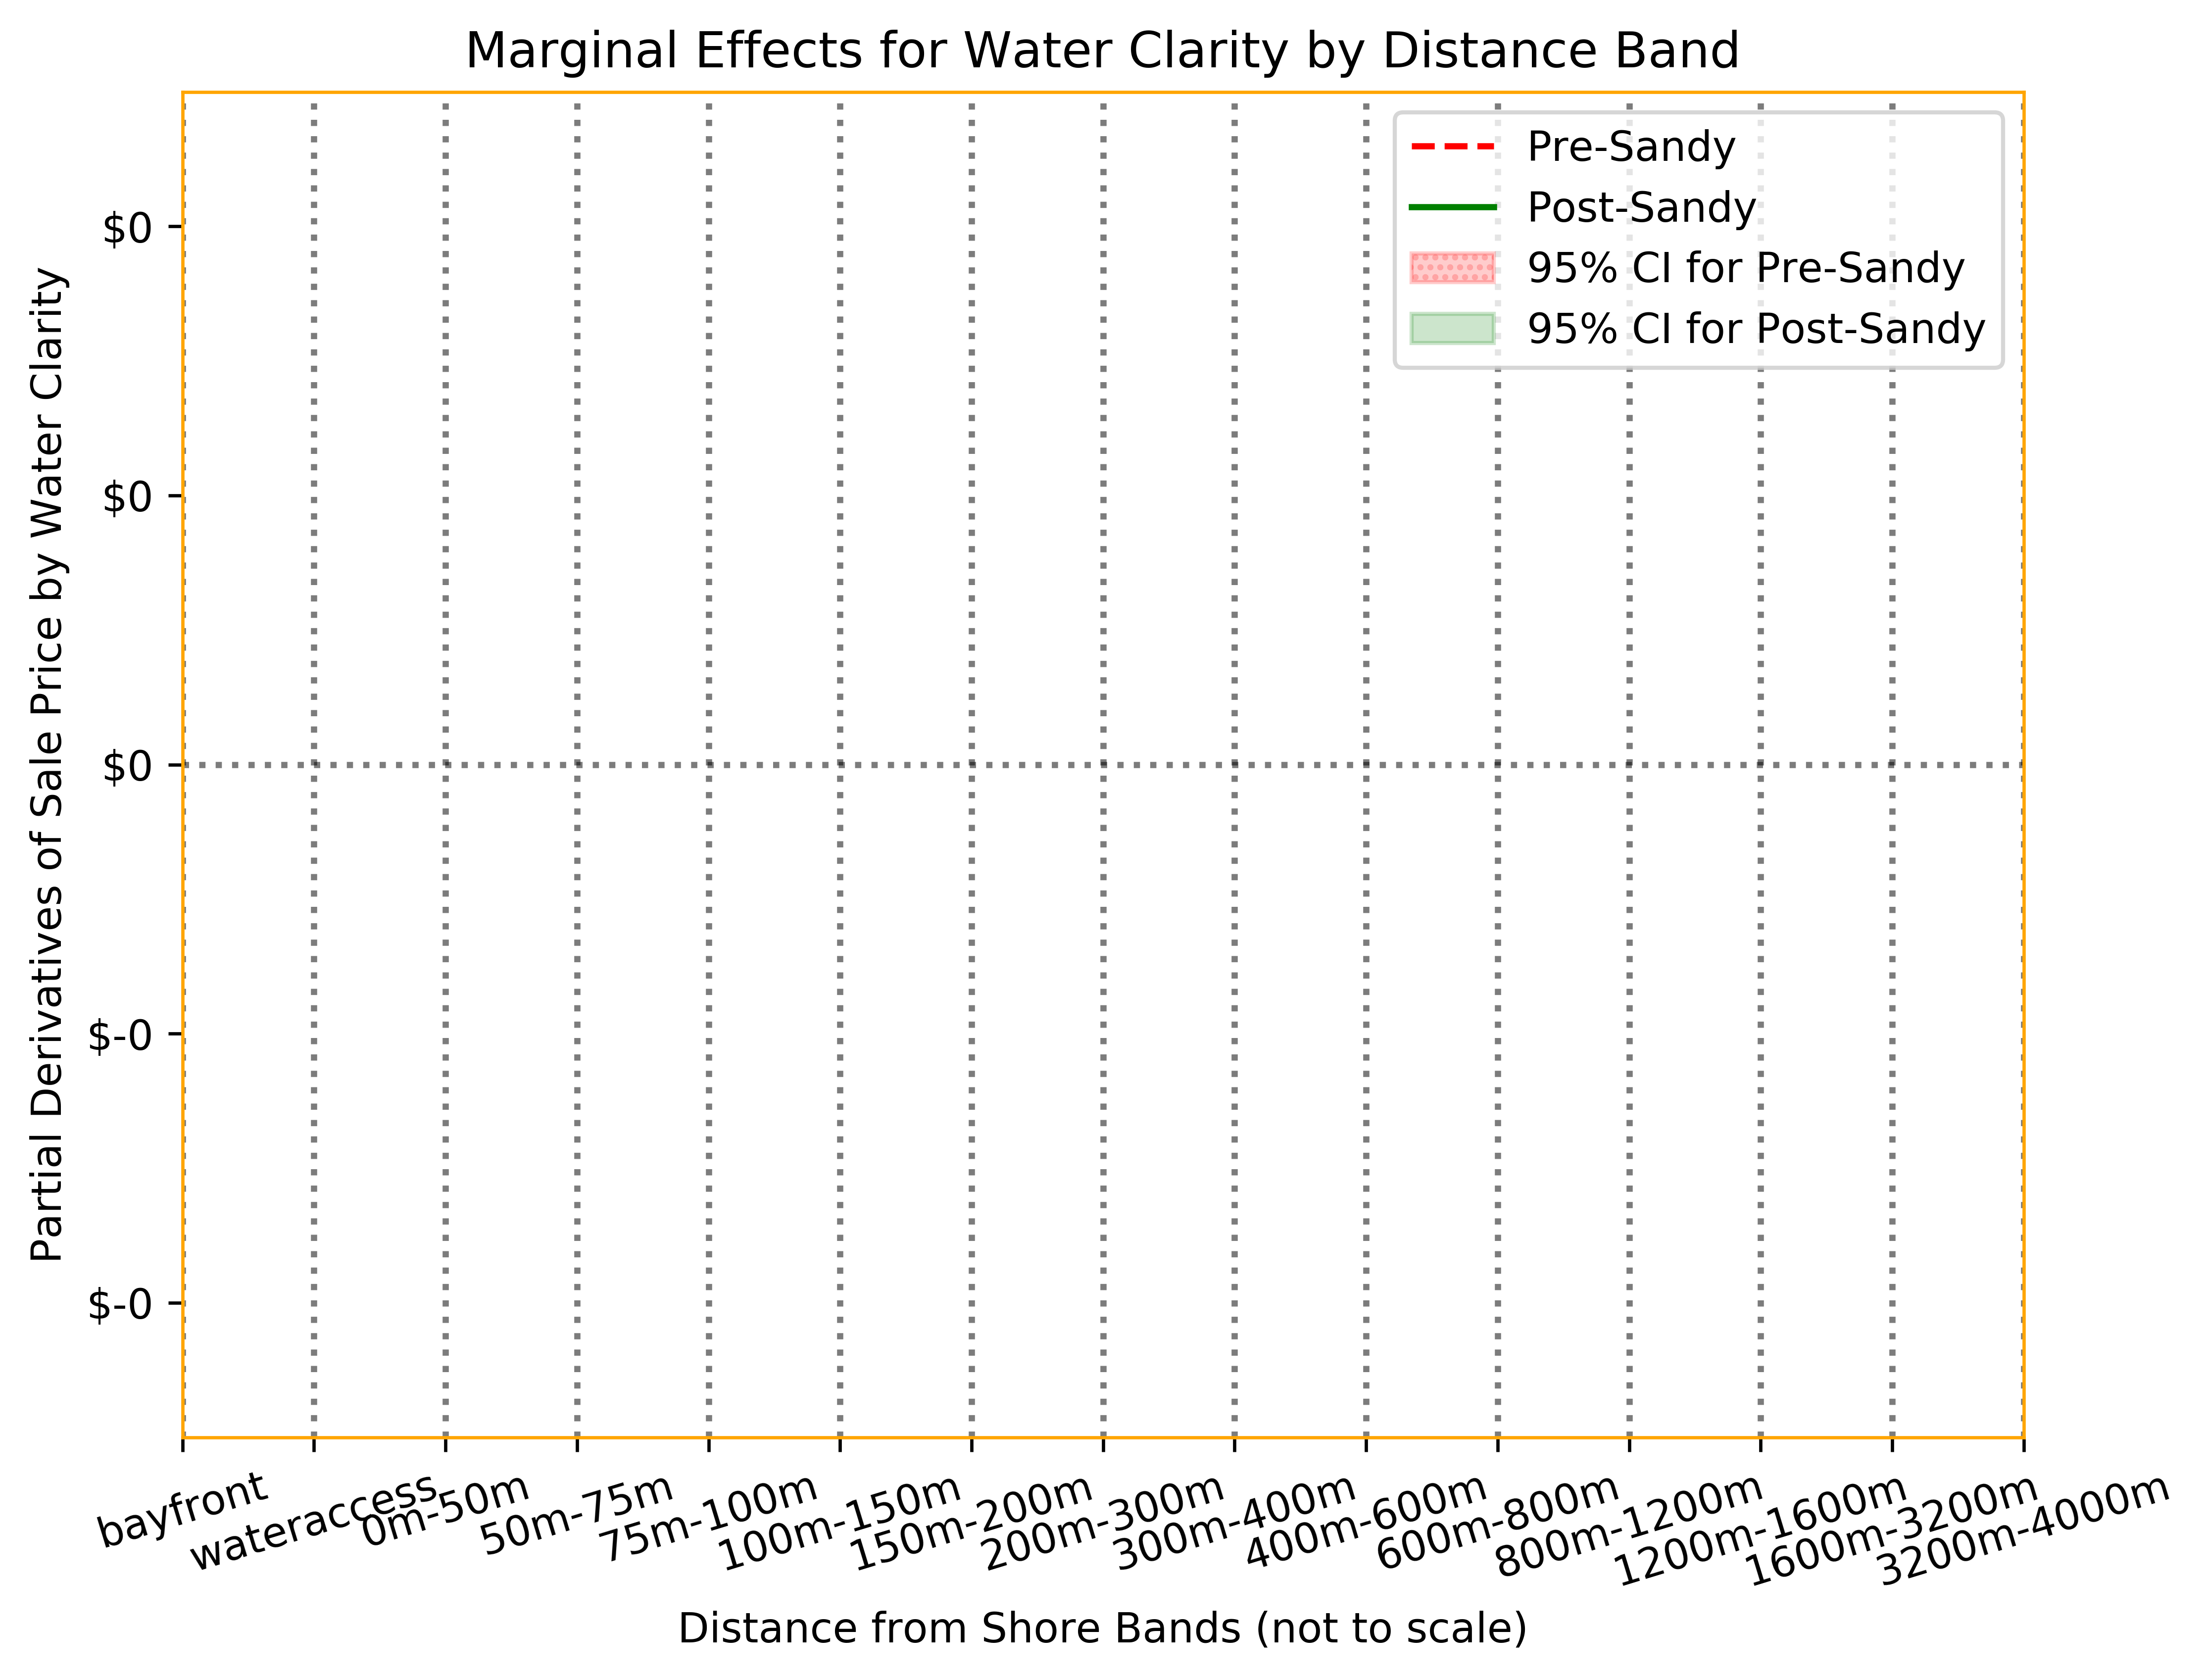

In [16]:
avg_df=idata_obj.createEffectsGraph()

In [17]:
idata_obj.estimateAnnualWQAvgMarginalEffect()

avg marginal effect dwt sum for period0 = 0.0
at r=0.03, annual benefits for period0 = 0.0
avg marginal effect dwt sum for period1 = 0.0
at r=0.03, annual benefits for period1 = 0.0


In [18]:
idata_obj.bigx


AttributeError: 'IslandData' object has no attribute 'bigx'

In [ ]:
import mlflow
mlflow.end_run()

In [ ]:
idata_obj.dist_avg_df.loc[:,'dv_2002']

In [ ]:
newdf=idata_obj.dist_avg_df.sum()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
newdf.loc['sale_year']

In [ ]:
newdf*.05